In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import r2_score# 선형 모델(Linear Models)
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 팀과제

1. trees.csv를 읽어들여서 아래에 대해
1) 상관관계, 다중공선성을 확인하시요
2) crossvalidation score 를 구하시요.
3) 아래의 데이터를 이용하여 Volume을 예측하시요
Girth 8.8, 10.5
Height 63, 72

2. volume이 40 이상이면 크다
30이상이면 보통 미만이면 적음으로
아래와 같이 출력하시요
volume  정도
============
 10.3    적음
...

3. Height  가 가장 작은값과 큰값을
구하시요

4. girth(테두리) 가 가장큰 top5를
구하시요(girth, height, volume)


교차검증필요. 볼륨값3열에 있음. 테투리와 높이 두개가 피쳐 상관관계, 다중공산성확인.

In [2]:
trees_df = pd.read_csv('data/trees.csv')
trees_df.shape

(31, 3)

In [3]:
import seaborn as sns

In [4]:
corr = trees_df.corr()

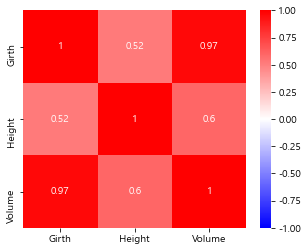

In [5]:
plt.figure( figsize=(5,4))
sns.heatmap( corr,annot=True, vmin= -1, vmax=1, cmap='bwr' ) #'seismic'
plt.show()

In [6]:
trees_df.values.shape

(31, 3)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(trees_df.values, i )  for i in range( trees_df.shape[1] ) ]
vif['features'] = trees_df.columns
vif

,VIF Factor,features
0,158.198657,Girth
1,62.939266,Height
2,32.993875,Volume


In [8]:
x_data = trees_df.iloc[:, :-1]
y_data = trees_df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data.values, test_size = 0.2, random_state=1)
model = make_pipeline(StandardScaler(),SGDRegressor(verbose=1))
model.fit(x_train, y_train)
r2scores = cross_val_score(model, x_data, y_data, cv=5, scoring='r2',verbose=1)
print(r2scores)
print(r2scores.mean())

-- Epoch 1
Norm: 2.46, NNZs: 2, Bias: 3.750124, T: 24, Avg. loss: 492.211564
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.91, NNZs: 2, Bias: 6.122698, T: 48, Avg. loss: 383.699299
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 5.01, NNZs: 2, Bias: 8.015510, T: 72, Avg. loss: 315.359938
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.90, NNZs: 2, Bias: 9.626242, T: 96, Avg. loss: 265.648899
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 6.67, NNZs: 2, Bias: 11.016594, T: 120, Avg. loss: 226.878081
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.31, NNZs: 2, Bias: 12.251526, T: 144, Avg. loss: 196.008429
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 7.87, NNZs: 2, Bias: 13.355931, T: 168, Avg. loss: 170.726444
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 8.36, NNZs: 2, Bias: 14.349150, T: 192, Avg. loss: 149.850583
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.79, NNZs: 2, Bias: 15.253444, T: 216, Avg. loss: 132.400003
Total training ti

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Norm: 16.15, NNZs: 2, Bias: 29.079491, T: 5775, Avg. loss: 7.112383
Total training time: 0.07 seconds.
-- Epoch 232
Norm: 16.15, NNZs: 2, Bias: 29.079281, T: 5800, Avg. loss: 7.111888
Total training time: 0.07 seconds.
Convergence after 232 epochs took 0.07 seconds
-- Epoch 1
Norm: 1.41, NNZs: 2, Bias: 3.259244, T: 25, Avg. loss: 268.375852
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.11, NNZs: 2, Bias: 5.220888, T: 50, Avg. loss: 209.327923
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.63, NNZs: 2, Bias: 6.775740, T: 75, Avg. loss: 172.841544
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.07, NNZs: 2, Bias: 8.092425, T: 100, Avg. loss: 145.749752
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.45, NNZs: 2, Bias: 9.234392, T: 125, Avg. loss: 124.431359
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.77, NNZs: 2, Bias: 10.238824, T: 150, Avg. loss: 107.278479
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.06, NNZs: 2, Bias: 11.136832, T: 175, A

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


[-2.51194629  0.67023176 -0.1617981   0.53107468 -0.67282137]
-0.42905186334684864

In [9]:
trees['정도'] = np.where(trees['Volume']>=40, '크다', np.where(trees['Volume']>=30, '보통', '적음'))
trees

#numpy 의 select를 쓰면 3가지 조건을 그냥 넣을 수 있다.
#np.select

NameError: name 'trees' is not defined